In [3]:
import zarr
import xarray as xr
import glob
import os

output_dir = './data'
zarr_store = zarr.open_group(path='/home/def/Backup/Uni/Magistrale/1/Second semester/Air-Quality-Monitoring-Platform/db/' + 'Padre_Pio' + '.zarr', mode='w')
files = glob.glob(output_dir + '/*.nc')
for file in files:

    timestep_db = xr.open_dataset(file, group='PRODUCT')
    timestep_db.to_zarr(zarr_store, mode='a', consolidated=True)
    os.remove(file)

    zarr_store.close()


KeyError: 'home/def/Backup/Uni/Magistrale/1/Second semester/Air-Quality-Monitoring-Platform/db/Padre_Pio.zarr/.zgroup/.zarray'

In [21]:
import zarr
import xarray as xr
import glob
import os

output_dir = './data'
#zarr_store = zarr.open_group(os.path.join('./db', 'Padre_Pio.zarr'), mode='w')
files = glob.glob(output_dir + '/*.nc')
for file in files:
    timestep_db = xr.open_dataset(file, group='PRODUCT')
    timestep_db.to_zarr(os.path.join('./db', 'Padre_Pio.zarr'), mode='a', consolidated=True, append_dim='scanline')
    os.remove(file)






sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito
sono entrato
sono entrato2
sono entrato3
sono uscito


AttributeError: 

In [49]:
import xarray as xr
import os

db = xr.open_zarr(os.path.join('./db', 'L2__CH4___TEST'), consolidated=True)

In [50]:
db

<xarray.Dataset>
Dimensions:                              (corner: 4, time: 3, scanline: 4173,
                                          ground_pixel: 215, layer: 12,
                                          level: 13)
Coordinates:
  * corner                               (corner) float64 0.0 1.0 2.0 3.0
  * ground_pixel                         (ground_pixel) float64 0.0 ... 214.0
    latitude                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
  * layer                                (layer) float64 0.0 1.0 ... 10.0 11.0
  * level                                (level) float64 0.0 1.0 ... 11.0 12.0
    longitude                            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
  * scanline                             (scanline) float64 0.0 ... 4.172e+03
  * time                                 (time) datetime64[ns] 2022-03-13 ......
Data variables:
    delta_time                           (time, scanline) datetime64[ns] dask.array<chunksize=(3, 4173), meta=np.ndarray>
    methane_mixing_ratio                 (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
    methane_mixing_ratio_bias_corrected  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
    methane_mixing_ratio_precision       (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
    qa_value                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
    time_utc                             (time, scanline) object dask.array<chunksize=(2, 4173), meta=np.ndarray>

In [10]:
net = xr.open_dataset("./data/S5P_OFFL_L2__CH4____20230514T204139_20230514T222310_28935_03_020500_20230516T125138.nc", group='PRODUCT')
net.to_netcdf("./test/S5P_OFFL_L2__CH4____20230514T204139_20230514T222310_28935_03_020500_20230516T125138.nc", mode='w', encoding={'time_utc': {'dtype': 'S1'}})
net = xr.open_dataset("./test/S5P_OFFL_L2__CH4____20230514T204139_20230514T222310_28935_03_020500_20230516T125138.nc")
net

<xarray.Dataset>
Dimensions:                              (scanline: 4172, ground_pixel: 215,
                                          time: 1, corner: 4, layer: 12,
                                          level: 13)
Coordinates:
  * scanline                             (scanline) float64 0.0 ... 4.171e+03
  * ground_pixel                         (ground_pixel) float64 0.0 ... 214.0
  * time                                 (time) datetime64[ns] 2023-05-14
  * corner                               (corner) float64 0.0 1.0 2.0 3.0
  * layer                                (layer) float64 0.0 1.0 ... 10.0 11.0
  * level                                (level) float64 0.0 1.0 ... 11.0 12.0
    latitude                             (time, scanline, ground_pixel) float32 ...
    longitude                            (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                           (time, scanline) datetime64[ns] ...
    time_utc                             (time, scanline) object ...
    qa_value                             (time, scanline, ground_pixel) float32 ...
    methane_mixing_ratio                 (time, scanline, ground_pixel) float32 ...
    methane_mixing_ratio_precision       (time, scanline, ground_pixel) float32 ...
    methane_mixing_ratio_bias_corrected  (time, scanline, ground_pixel) float32 ...

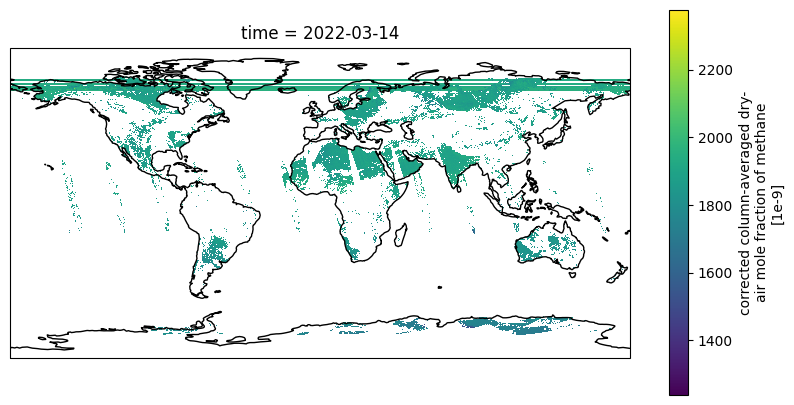

In [24]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

db.methane_mixing_ratio_bias_corrected[0].plot.pcolormesh(ax=ax, x='longitude', y='latitude', add_colorbar=True)

ax.set_global(); ax.coastlines()
plt.show()

In [3]:
import xarray as xr
import os

db = xr.open_zarr(os.path.join('./db', 'L2__CH4___TEST'), consolidated=True)
db

<xarray.Dataset>
Dimensions:                              (corner: 4, time: 3, scanline: 4173,
                                          ground_pixel: 215, layer: 12,
                                          level: 13)
Coordinates:
  * corner                               (corner) float64 0.0 1.0 2.0 3.0
  * ground_pixel                         (ground_pixel) float64 0.0 ... 214.0
    latitude                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
  * layer                                (layer) float64 0.0 1.0 ... 10.0 11.0
  * level                                (level) float64 0.0 1.0 ... 11.0 12.0
    longitude                            (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
  * scanline                             (scanline) float64 0.0 ... 4.172e+03
  * time                                 (time) datetime64[ns] 2022-03-13 ......
Data variables:
    delta_time                           (time, scanline) datetime64[ns] dask.array<chunksize=(3, 4173), meta=np.ndarray>
    methane_mixing_ratio                 (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
    methane_mixing_ratio_bias_corrected  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
    methane_mixing_ratio_precision       (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
    qa_value                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 215), meta=np.ndarray>
    time_utc                             (time, scanline) object dask.array<chunksize=(2, 4173), meta=np.ndarray>

In [53]:
db

In [58]:
db_sel = db.sel(latitude = 46.074779, longitude = 11.121749, method="nearest")

KeyError: "no index found for coordinate 'latitude'"

In [13]:
db_sel

<xarray.Dataset>
Dimensions:                              (corner: 4, scanline: 4173,
                                          ground_pixel: 215, layer: 12,
                                          level: 13)
Coordinates:
  * corner                               (corner) float64 0.0 1.0 2.0 3.0
  * ground_pixel                         (ground_pixel) float64 0.0 ... 214.0
    latitude                             (scanline, ground_pixel) float32 dask.array<chunksize=(4173, 215), meta=np.ndarray>
  * layer                                (layer) float64 0.0 1.0 ... 10.0 11.0
  * level                                (level) float64 0.0 1.0 ... 11.0 12.0
    longitude                            (scanline, ground_pixel) float32 dask.array<chunksize=(4173, 215), meta=np.ndarray>
  * scanline                             (scanline) float64 0.0 ... 4.172e+03
    time                                 datetime64[ns] 2022-03-14
Data variables:
    delta_time                           (scanline) datetime64[ns] dask.array<chunksize=(4173,), meta=np.ndarray>
    methane_mixing_ratio                 (scanline, ground_pixel) float32 dask.array<chunksize=(4173, 215), meta=np.ndarray>
    methane_mixing_ratio_bias_corrected  (scanline, ground_pixel) float32 dask.array<chunksize=(4173, 215), meta=np.ndarray>
    methane_mixing_ratio_precision       (scanline, ground_pixel) float32 dask.array<chunksize=(4173, 215), meta=np.ndarray>
    qa_value                             (scanline, ground_pixel) float32 dask.array<chunksize=(4173, 215), meta=np.ndarray>
    time_utc                             (scanline) object dask.array<chunksize=(4173,), meta=np.ndarray>

In [60]:
import xarray as xr
db = xr.open_dataset("./db/L2__CH4___TEST.nc")
db

<xarray.Dataset>
Dimensions:                              (scanline: 4173, ground_pixel: 215,
                                          corner: 4, layer: 12, level: 13,
                                          time: 3)
Coordinates:
  * scanline                             (scanline) float64 0.0 ... 4.172e+03
  * ground_pixel                         (ground_pixel) float64 0.0 ... 214.0
  * corner                               (corner) float64 0.0 1.0 2.0 3.0
  * layer                                (layer) float64 0.0 1.0 ... 10.0 11.0
  * level                                (level) float64 0.0 1.0 ... 11.0 12.0
  * time                                 (time) datetime64[ns] 2022-03-13 ......
    latitude                             (time, scanline, ground_pixel) float32 ...
    longitude                            (time, scanline, ground_pixel) float32 ...
Data variables:
    delta_time                           (time, scanline) datetime64[ns] ...
    time_utc                             (time, scanline) object ...
    qa_value                             (time, scanline, ground_pixel) float32 ...
    methane_mixing_ratio                 (time, scanline, ground_pixel) float32 ...
    methane_mixing_ratio_precision       (time, scanline, ground_pixel) float32 ...
    methane_mixing_ratio_bias_corrected  (time, scanline, ground_pixel) float32 ...

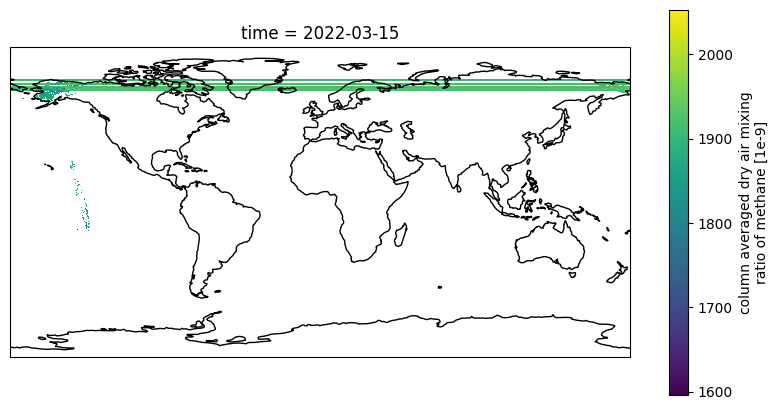

In [63]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

db.methane_mixing_ratio[2].plot.pcolormesh(ax=ax, x='longitude', y='latitude', add_colorbar=True)

ax.set_global(); ax.coastlines()
plt.show()